<a href="https://colab.research.google.com/github/GirishHiremath/ML/blob/main/Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyforest

  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=d9d2927b5966535d2d421ddd18cdaab32cbb3cca69db59379729e639878dd1a3
  Stored in directory: /root/.cache/pip/wheels/61/1c/da/48e6c884142d485475d852d69d20a096aba5beceb338822893
Successfully built pyforest


In [16]:
import pyforest
import warnings
from sklearn.decomposition import PCA

In [6]:
data=pd.read_csv('/content/Mall_Customers.csv')
data.head()

<IPython.core.display.Javascript object>

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
data.shape

(200, 5)

In [9]:
data.drop('CustomerID',axis=1,inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [11]:
data=pd.get_dummies(data,drop_first=True)
data.head()

<IPython.core.display.Javascript object>

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
 3   Gender_Male             200 non-null    uint8
dtypes: int64(3), uint8(1)
memory usage: 5.0 KB


In [14]:
data.isna().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Gender_Male               0
dtype: int64

Running K-means algorithm to identify ideal number of clusters using elbow-point method. Clusters 3,4,5,6 are considered as ideal from the belpw graph but will depand on how the distribution looks

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

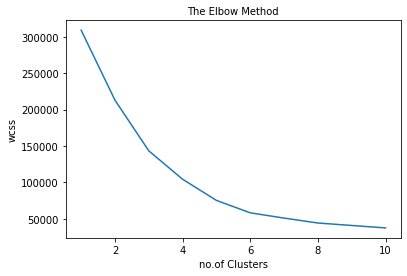

In [23]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
  km.fit(data)
  wcss.append(km.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method',fontsize=10)
plt.xlabel('no.of Clusters')
plt.ylabel('wcss')
plt.show()

In [37]:
#Running the K-means algorithm by using 3 clusters as decided from above elbow graph
km=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=km.fit_predict(data)

In [38]:
#Convering numpy array of clusters to dataframe to see the distribution in each cluster
cluster_df=pd.DataFrame(data=y_means,columns=['cluster'])

<IPython.core.display.Javascript object>

In [39]:
#Disrtibution seems to be biased towards 3rd cluster which is cluster number 0
cluster_df.groupby('cluster').size()

cluster
0     38
1     39
2    123
dtype: int64

Running the Silhouette score for k-means through numerical oops for checking best number og distribution to be used for clustering

More about Silhouette Score


*   Silhouette refers to a method of interpretion and validation of consistency within clusters of data. The technique provides a best graphical representation of how will each object has been classified in each cluster. Lesser the silhouette score poor the classification,and vice-versa Silhouette score ranges between 0-1







In [44]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,20):
  kmeans=KMeans(init='k-means++',n_clusters=n_clusters,n_init=50)
  kmeans.fit(data)
  clusters=kmeans.predict(data)
  silhouette_avg=silhouette_score(data,clusters)
  print('For n_clusters=',n_clusters,'The average silhouette_score is:',silhouette_avg)

For n_clusters= 2 The average silhouette_score is: 0.29307334005502633
For n_clusters= 3 The average silhouette_score is: 0.383798873822341
For n_clusters= 4 The average silhouette_score is: 0.4052954330641215
For n_clusters= 5 The average silhouette_score is: 0.4440669204743008
For n_clusters= 6 The average silhouette_score is: 0.45205475380756527
For n_clusters= 7 The average silhouette_score is: 0.44096462877395787
For n_clusters= 8 The average silhouette_score is: 0.427541566977401
For n_clusters= 9 The average silhouette_score is: 0.41489060683040535
For n_clusters= 10 The average silhouette_score is: 0.3824739410656488
For n_clusters= 11 The average silhouette_score is: 0.3690633160262062
For n_clusters= 12 The average silhouette_score is: 0.35793644474008124
For n_clusters= 13 The average silhouette_score is: 0.34307384911950917
For n_clusters= 14 The average silhouette_score is: 0.34545377180086073
For n_clusters= 15 The average silhouette_score is: 0.3483940071922615
For n_clu

Running the Silhouette score for k-means through visulisation for checking best number of clusters to be used for clustering

In [49]:
'''silhouette_scores=[]
for n_clusters in range(2,20):
  silhouette_scores.append(silhouette_score(data,KMeans(n_clusters).fit_predict(data)))

  #pottting a bar graph to compare the resultes
  k=[2,3,4,5,6,7]
  plt.bar(k,silhouette_scores)
  plt.xlabel('Number of clusters:',fontsize=10)
  plt.ylabel('Silhouatte Score',fontsize=10)
  plt.show()'''

"silhouette_scores=[]\nfor n_clusters in range(2,20):\n  silhouette_scores.append(silhouette_score(data,KMeans(n_clusters).fit_predict(data)))\n\n  #pottting a bar graph to compare the resultes\n  k=[2,3,4,5,6,7]\n  plt.bar(k,silhouette_scores)\n  plt.xlabel('Number of clusters:',fontsize=10)\n  plt.ylabel('Silhouatte Score',fontsize=10)\n  plt.show()"

Running the Silhouette score for agglomerative clustering with 'average' linkage through numerical loops for checking best number of clusters to be used for clustering in agglomerative


In [51]:
from sklearn.cluster import AgglomerativeClustering
for n_clusters in range(2,8):
  aglo=AgglomerativeClustering(n_clusters=n_clusters,linkage='average')
  aglo.fit(data)
  clusters=aglo.fit_predict(data)
  silhouette_avg=silhouette_score(data,clusters)
  print('For n_clusters=',n_clusters,'The average silhouette_score is:',silhouette_avg)

For n_clusters= 2 The average silhouette_score is: 0.31577520928038805
For n_clusters= 3 The average silhouette_score is: 0.3812859576468096
For n_clusters= 4 The average silhouette_score is: 0.4102091359195185
For n_clusters= 5 The average silhouette_score is: 0.43521075902386996
For n_clusters= 6 The average silhouette_score is: 0.4184037015474744
For n_clusters= 7 The average silhouette_score is: 0.40998315593156753


In [52]:
from sklearn.cluster import AgglomerativeClustering
for n_clusters in range(9,15):
  aglo=AgglomerativeClustering(n_clusters=n_clusters,linkage='average')
  aglo.fit(data)
  clusters=aglo.fit_predict(data)
  silhouette_avg=silhouette_score(data,clusters)
  print('For n_clusters=',n_clusters,'The average silhouette_score is:',silhouette_avg)

For n_clusters= 9 The average silhouette_score is: 0.41011265964616683
For n_clusters= 10 The average silhouette_score is: 0.39218406299832453
For n_clusters= 11 The average silhouette_score is: 0.39190017675806826
For n_clusters= 12 The average silhouette_score is: 0.39327169060135986
For n_clusters= 13 The average silhouette_score is: 0.38220252316347625
For n_clusters= 14 The average silhouette_score is: 0.36000852742864387


Running the Aglomerative algorithm by using 6 clusters

In [57]:
algo_cluster=AgglomerativeClustering(n_clusters=3,linkage='average')
algo_cluster.fit(data)
clusters=algo_cluster.fit_predict(data)

Converting numpy array of clusters to dataframe to see the distribution in each cluster

In [58]:
cluster_df=pd.DataFrame(data=clusters,columns=['cluster'])

<IPython.core.display.Javascript object>

Distribution seems to highly be biased towaards 1st cluster which is cluster number 0 and poorly performing the k-means in terms of distribution

In [59]:
cluster_df.groupby('cluster').size()

cluster
0    126
1     35
2     39
dtype: int64

Running the Silhouette score for agglomerative clustering with 'single' linkage thtough numerical loops for checking best number of clusters to used for clustering in agglomerative

In [60]:
from sklearn.cluster import AgglomerativeClustering
for n_clusters in range(2,8):
  aglo=AgglomerativeClustering(n_clusters=n_clusters,linkage='single')
  aglo.fit(data)
  clusters=aglo.fit_predict(data)
  silhouette_avg=silhouette_score(data,clusters)
  print('For n_clusters=',n_clusters,'The average silhouette_score is:',silhouette_avg)

For n_clusters= 2 The average silhouette_score is: 0.39083611393057793
For n_clusters= 3 The average silhouette_score is: 0.30489109365175143
For n_clusters= 4 The average silhouette_score is: 0.2736590849581382
For n_clusters= 5 The average silhouette_score is: 0.24285967345045742
For n_clusters= 6 The average silhouette_score is: 0.16486633454475855
For n_clusters= 7 The average silhouette_score is: 0.13642817411032682


Running the Silhouette score for agglomerative clustering witj 'ward'linkage through numerical loops for checking best number of clusters to be used for clustering in agglomerative. if nothing specified, default is the ward linkage too

In [61]:
from sklearn.cluster import AgglomerativeClustering
for n_clusters in range(2,8):
  aglo=AgglomerativeClustering(n_clusters=n_clusters,linkage='ward')
  aglo.fit(data)
  clusters=aglo.fit_predict(data)
  silhouette_avg=silhouette_score(data,clusters)
  print('For n_clusters=',n_clusters,'The average silhouette_score is:',silhouette_avg)

For n_clusters= 2 The average silhouette_score is: 0.29916602844367
For n_clusters= 3 The average silhouette_score is: 0.3812859576468096
For n_clusters= 4 The average silhouette_score is: 0.4102091359195185
For n_clusters= 5 The average silhouette_score is: 0.43997527212476695
For n_clusters= 6 The average silhouette_score is: 0.4428008535928764
For n_clusters= 7 The average silhouette_score is: 0.42593881050851595


Running the Silhouette score for agglomerative clustering with 'complete' linkage through numerical loops for checking best number of clusters to be used for clustering in aglomerative

In [62]:
from sklearn.cluster import AgglomerativeClustering
for n_clusters in range(2,8):
  aglo=AgglomerativeClustering(n_clusters=n_clusters,linkage='complete')
  aglo.fit(data)
  clusters=aglo.fit_predict(data)
  silhouette_avg=silhouette_score(data,clusters)
  print('For n_clusters=',n_clusters,'The average silhouette_score is:',silhouette_avg)

For n_clusters= 2 The average silhouette_score is: 0.29916602844367
For n_clusters= 3 The average silhouette_score is: 0.3812859576468096
For n_clusters= 4 The average silhouette_score is: 0.4102091359195185
For n_clusters= 5 The average silhouette_score is: 0.43997527212476695
For n_clusters= 6 The average silhouette_score is: 0.42326551539571566
For n_clusters= 7 The average silhouette_score is: 0.4141207457542422


**Comparing the output of kmeans, Agglomerative and Birch algorithms using 3 matrics**



1.   Silhouette Score
2.   Calinsk Harabaz Score
3.   Davies Bouldin Score

Calinsk Harabaz Score:

  Calinsk Harabaz index The Calinsk Harabaz index also known as the Variance Ratio Criterion, Is the ratio of sum of between-cluster dispersion and of inter-cluster dispression for all clusters, the higher the score, the better the performances. The score is higher when clusters are dense and well separated. which relates to a standard concept of cluster.The score is fast to compute.


Davies Bouldin Score:

  Davies Bouldin index This index signifies the average 'similarity' between clusters, where the measure that compares the distanc between cluster with size of the clusters with size of the clusters themseleves. A lower Davies Bouldin index relates to a model with better seperation between the clusters. The computation of Davies Bouldin is simpler then of Silhouette Score 




In [ ]:
output=pd.DataFrame(index=['K-means','Agglomerative','Birch'],
                    columns=['SC','CH','DB'])

In [68]:
#Importing the necessary libraries for the Clustering algorithm
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn import datasets
from sklearn.cluster import KMeans,DBSCAN, Birch
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

Scalng the data before performing hypothesis on 10 clusters for each algorithm

In [64]:
from sklearn.preprocessing import StandardScaler, normalize
#Standardize data
scaler=StandardScaler()
scaled_df=scaler.fit_transform(data)

Elbo graph for scaled data. Here we see that elbow curve is not a smooth curve and has multiple elbow points. so 3,4 connot be consider as ideal clusters as they will be else unevenly distributed and biased towards 1 cluster due to irregular elbo graph

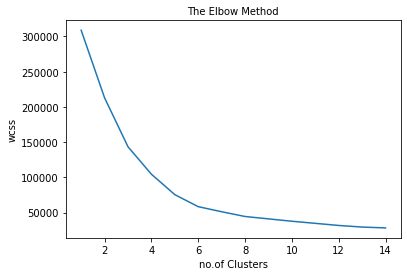

In [72]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,15):
  km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
  km.fit(data)
  wcss.append(km.inertia_)

plt.plot(range(1,15),wcss)
plt.title('The Elbow Method',fontsize=10)
plt.xlabel('no.of Clusters')
plt.ylabel('wcss')
plt.show()

Running k-means clusterong for 10 clusters and the results in Output dataframe. Random selection to identify which algorithm worked best on 10 clusters

In [100]:
from sklearn.cluster import KMeans
#Fitting K-means to data
clust_model=KMeans(n_clusters=10,random_state=17)
clust_model.fit(scaled_df)
#Evaluating model's performance
output={}
labels=clust_model.labels_
output['K-means','SC']=metrics.silhouette_score(scaled_df,labels,metric='euclidean')
output['K-means','CH']=metrics.calinski_harabasz_score(scaled_df,labels)
output['K-means','DB']=metrics.davies_bouldin_score(scaled_df,labels)
print(output)


{('K-means', 'SC'): 0.42076374869477745, ('K-means', 'CH'): 89.97819558254272, ('K-means', 'DB'): 0.8331029646644401}


In [99]:

#Fitting Agglomerative to data
clust_model=AgglomerativeClustering(n_clusters=10,linkage='average')
clust_model.fit(scaled_df)
#Evaluating model's performance
output1={}
labels=clust_model.labels_
output1['Agglomerative','SC']=metrics.silhouette_score(scaled_df,labels,metric='euclidean')
output1['Agglomerative','CH']=metrics.calinski_harabasz_score(scaled_df,labels)
output1['Agglomerative','DB']=metrics.davies_bouldin_score(scaled_df,labels)
print(output1)

{('Agglomerative', 'SC'): 0.3743144491168564, ('Agglomerative', 'CH'): 68.64792224215655, ('Agglomerative', 'DB'): 0.900034653815014}


In [101]:
clust_model=Birch(n_clusters=10)
clust_model.fit(scaled_df)
#Evaluating model's performance
output2={}
labels=clust_model.labels_
output2['Birch','SC']=metrics.silhouette_score(scaled_df,labels,metric='euclidean')
output2['Birch','CH']=metrics.calinski_harabasz_score(scaled_df,labels)
output2['Birch','DB']=metrics.davies_bouldin_score(scaled_df,labels)
print(output2)

{('Birch', 'SC'): 0.4137529731797555, ('Birch', 'CH'): 86.40147852426651, ('Birch', 'DB'): 0.8292315011168008}


Comparing the results of each clustering algorithm using the 3 metrics which are silhouette score calinski-harabaz-score and davies-bouldin score

In [97]:
'''output=pd.DataFrame(index=['K-means','Agglomerative','Birch'],
                    columns=['SC','CH','DB'])'''
compar=pd.DataFrame.from_dict(output)

In [110]:
output_kmeans = pd.DataFrame()
output_kmeans = output_kmeans.append(output,ignore_index=True )
output_agglo = pd.DataFrame()
output_agglo = output_agglo.append(output1,ignore_index=True )
output_agglo = pd.DataFrame()
output_birch = output_birch.append(output2,ignore_index=True )


In [116]:
print(output_kmeans,"\n")
print(output_agglo,"\n")
print(output_birch,"\n")

   (K-means, SC)  (K-means, CH)  (K-means, DB)
0       0.420764      89.978196       0.833103 

   (Agglomerative, SC)  (Agglomerative, CH)  (Agglomerative, DB)
0             0.374314            68.647922             0.900035 

   (Birch, SC)  (Birch, CH)  (Birch, DB)
0     0.413753    86.401479     0.829232 



Distribution of k-means with 10 clusters

In [117]:
km=KMeans(n_clusters=10,init='k-means++',max_iter=300,n_init=30, random_state=0)
y_means=km.fit_predict(scaled_df)

In [118]:
cluster_df=pd.DataFrame(data=y_means,columns=['cluster'])

cluster_df.groupby('cluster').size()

cluster
0    14
1    13
2    18
3    24
4    21
5    19
6    26
7    14
8    26
9    25
dtype: int64

Sum of squared error, SSE for K-means

In [119]:
km.inertia_

152.02983429775685

Distribution of Agglomerative with 10 clusters

In [121]:
aglo_cluster=AgglomerativeClustering(n_clusters=10,linkage='average')
aglo_cluster.fit(scaled_df)
clusters=aglo_cluster.fit_predict(scaled_df)

In [122]:
cluster_df=pd.DataFrame(data=clusters,columns=['cluster'])

cluster_df.groupby('cluster').size()

cluster
0    18
1    44
2    23
3    32
4    22
5    18
6    15
7    21
8     5
9     2
dtype: int64

Distribution of birch with 10 clusters

In [124]:
Birch_cluster=Birch(n_clusters=10)
Birch_cluster.fit(scaled_df)
clusters_birch=aglo_cluster.fit_predict(scaled_df)

In [125]:
cluster_df=pd.DataFrame(data=clusters_birch,columns=['cluster'])

cluster_df.groupby('cluster').size()

cluster
0    18
1    25
2    27
3    18
4    12
5    15
6    13
7    30
8    21
9    21
dtype: int64

K-Means is the best clustering Algorithm for Mall_customers dataset